## 1. Introduction

hallo

### Table of contents

- 1. Introduction

- 2. Exploratory data analysis
- 2. 1 Importing Libraries and load the data
- 3. Preprocessing
- 3. 1 Cleaning the data 
- 3. 2 Handling missing values
- 3. 3 Converting text labels to numbers (feature encoding)
- 4. Modelling
- 4. 1 symple base-line model
- 4. 2 two sophisticated model approaches
- 4. 3 Experiment and testing the model
- 5. Results
- 6. Discussion


## 2. Exploratory data analysis

Analyse your data. Visualise and explain the data features you deem to be relevant for
the project.

### 2.1 Importing Libraries and load data

In [20]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import seaborn as sns


heart_data = pd.read_csv("Heart_Disease_Prediction.csv")

heart_data.head()


,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## 2.1 Data Dictionary
1. **age:** age in years (Numeric)
2. **sex:** biological gender of the patient (Categorical)
3. **chest pain type:** the type of chest pain experienced by the patient (Categorical)
4. **BP:** blood pressure level of the patient (Numeric)
5. **cholesterol:** cholesterol level of the patient (Numeric)
6. **FBS over 120:** fasting blood sugar test results over 120 mg/dl (Categorical)
7. **EKG results:** electrocardiogram results of the patient (Categorical)
8. **Max HR:** maximum heart rate levels achieved during exercise testing (Numeric)
9. **Excercise angina:** angina experienced during exercise testing ( Categorical)
10. **ST depression:** ST depression on an Electrocardiogram (Numeric)
11. **Slope of ST:** The slope of ST segment electrodiagram readings (Categorical)
12. **Number of vessles fluro:** amount of vessels seen in Fluoroscopy images ( Categorical)
13. **Thallium:** Thallium Stress test findings (Categorical)
14. **Heart Disease:** Whether or not the patient has been diagnosed with Heart Disease (Categorical)

### Categorial features documenation:
**1. Sex:**

    0 = female 
    
    1 = male

**2. chest pain type:** 

    1 = typical angina

    2 = atypical angina

    3 = non-anginal pain

    4 = asymptomatic

**3. FBS over 120:**

    0 = no

    1 = yes

**4. EKG results:**

    0 = normal

    1 = having ST-T wave abnormality

    2 = showing probable or definite left ventricular hyperthrophy

**5. Excercise induced angina:**

    0 = no

    1 = yes

**6. Slope of ST:**

    1 = upslopong

    2 = flat

    3 = downsloping

**7. Number of vessles fluro:**

    Range of values from 1 to 3

**8. Thalium:**

    3 = normal

    6 = fixed

    7 = reversable defect

*source: https://archive.ics.uci.edu/dataset/45/heart+disease*


In [15]:
heart_data.shape
heart_data.dtypes
heart_data.isna().sum()
heart_data.isnull().sum()
heart_data.duplicated().sum()
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

This dataset contains vital insight of 270 patients. Each patient is identified by 13 indipendent varibles, which can be seen as 13 different featurest for further analysis. There are no null or nan values found in the dataset. There is also no duplicates in the values. As the goal is to predict if someone gets a heart disease, the feature heart disease is our target variable, which is categorical, so it needs to be encoded.

In [14]:
heart_data.describe().T.round(2)
#.T makes that the features are written down as columns
# The values where rounded to two decimal values after point

#etwas noch zur Varianz

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.43,9.11,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.68,0.47,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.17,0.95,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.34,17.86,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.66,51.69,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.02,1.00,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.68,23.17,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.33,0.47,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.05,1.15,0.0,0.0,0.8,1.6,6.2


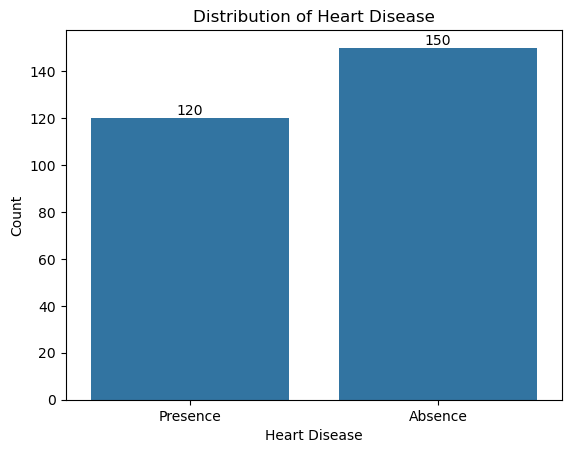

In [47]:

#countplot for only the presence or absence of heart disease
disease_plot = sns.countplot(x="Heart Disease", data=heart_data)


for container in disease_plot.containers:
    disease_plot.bar_label(container)

plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.title("Distribution of Heart Disease")
plt.show()

There are 120 patients with a heart disease and 150 patient dont show a presence of heart disease. 

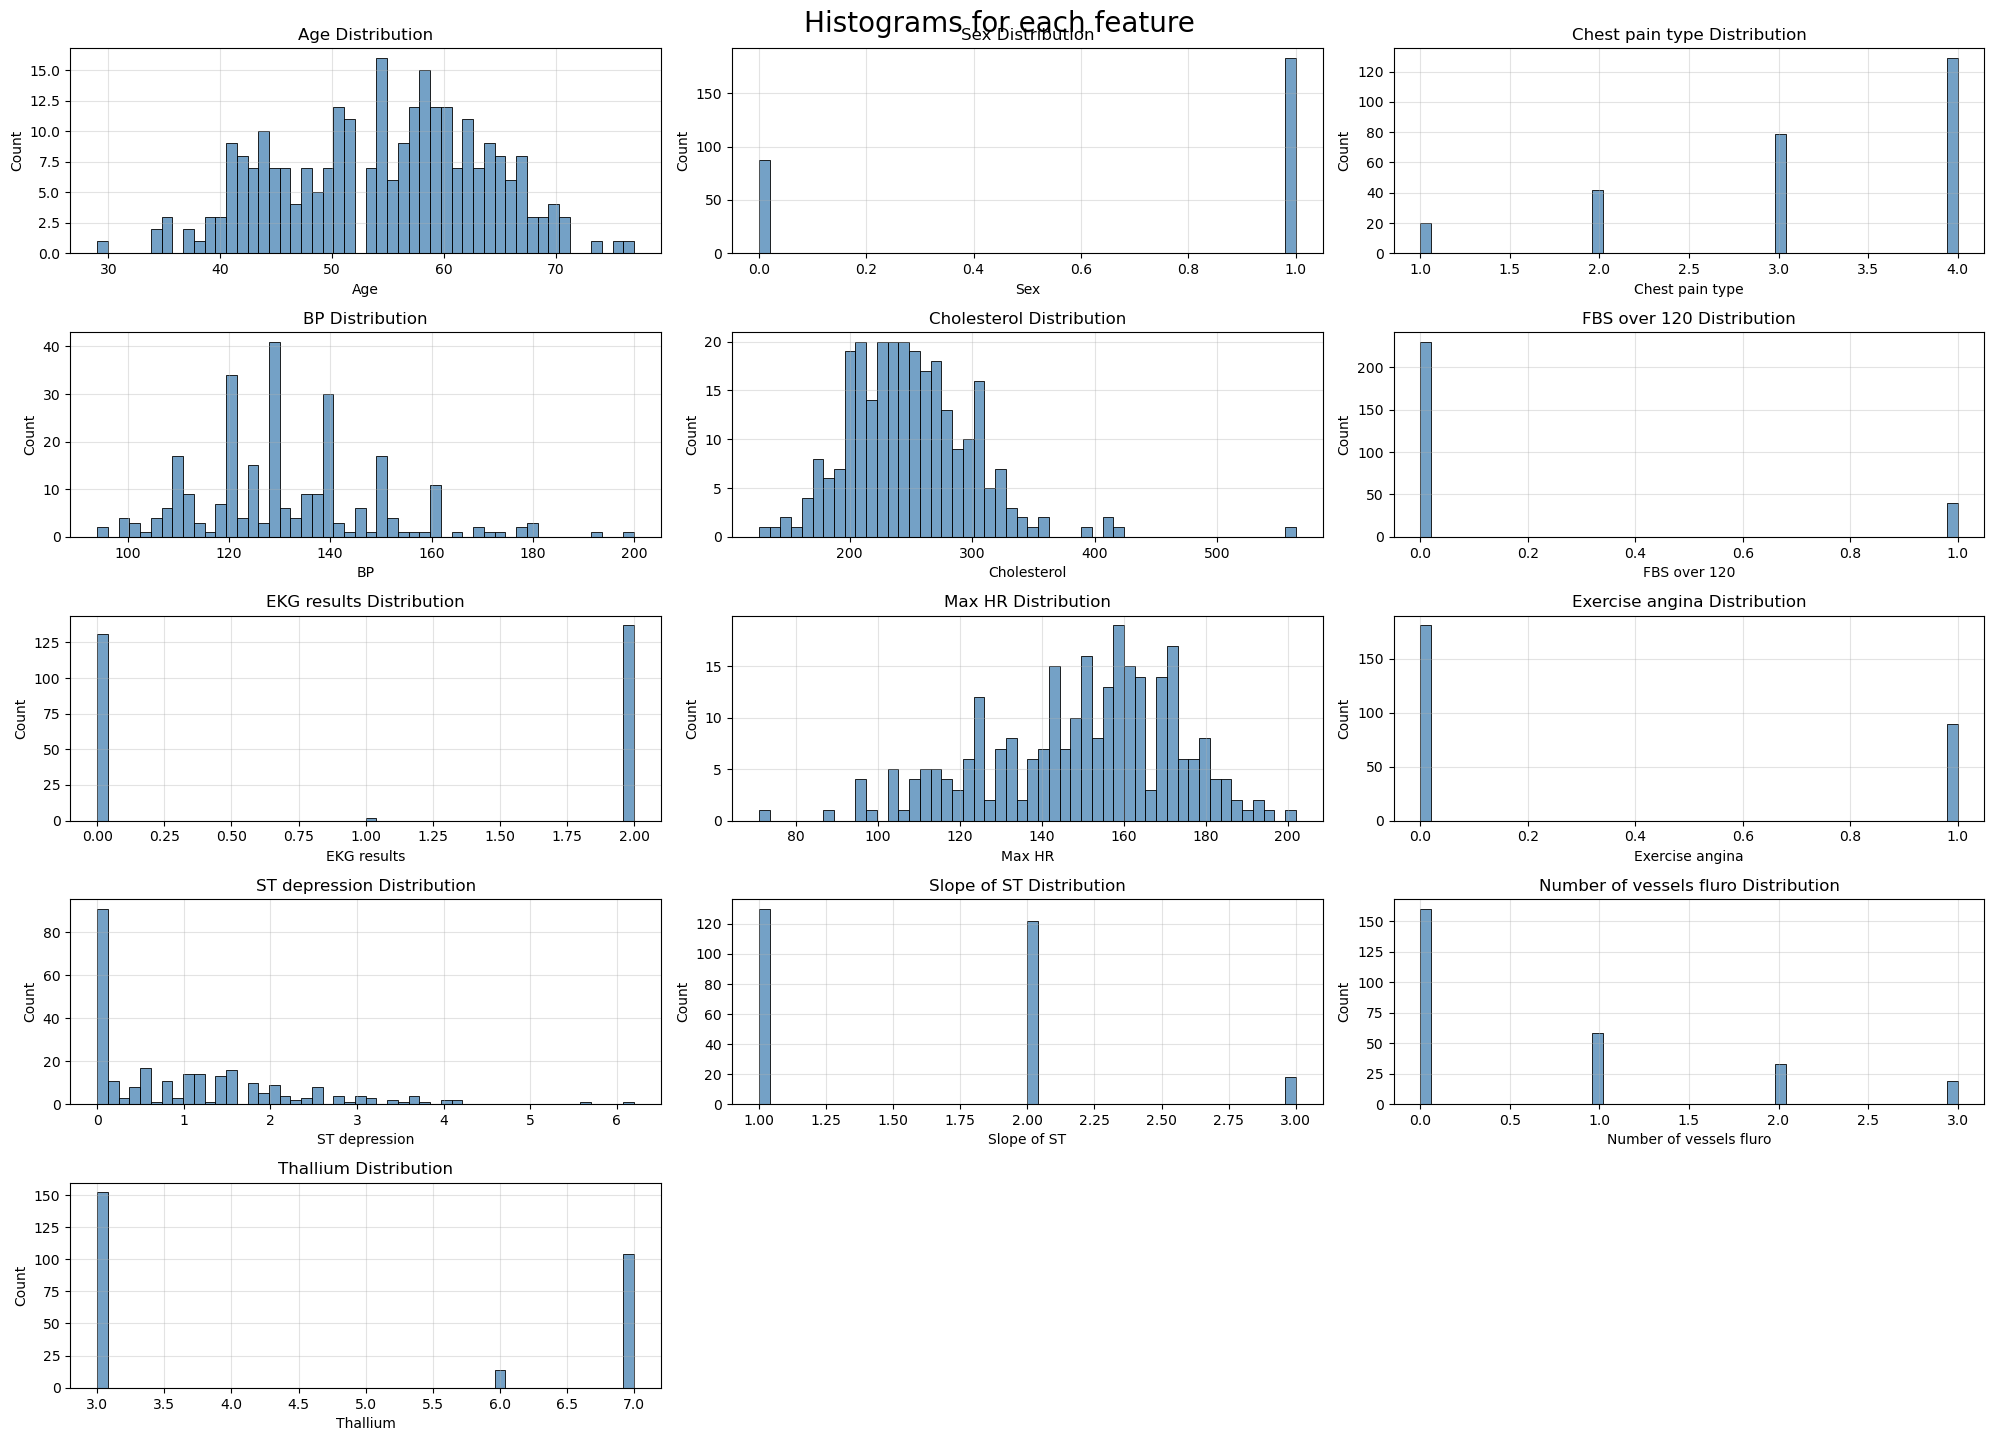

In [48]:

#Distribution of all the varibles

# Create a new dataframe with all the features except the target feature
data = heart_data.loc[:, ~heart_data.columns.isin(["Heart Disease"])]

# Find the number of variables in the dataframe
num_vars =  len(data.columns)

# Calculate the number of rows and columns needed for the grid of subplots
num_rows = (num_vars // 2) + (num_vars % 2)
num_cols = 3

# Grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))

# Flatten the 2D array of axes into a 1D array
axes = axes.flatten()


for i, col in enumerate(data.columns):
    sns.histplot(data[col], bins=50, ax=axes[i], color="steelblue")
    axes[i].set_title(f"{col} Distribution")
    axes[i].grid(alpha=0.35)

for j in range(num_vars, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.suptitle("Histograms for each feature", fontsize=20)
plt.tight_layout()
plt.show()


Etwas erklären

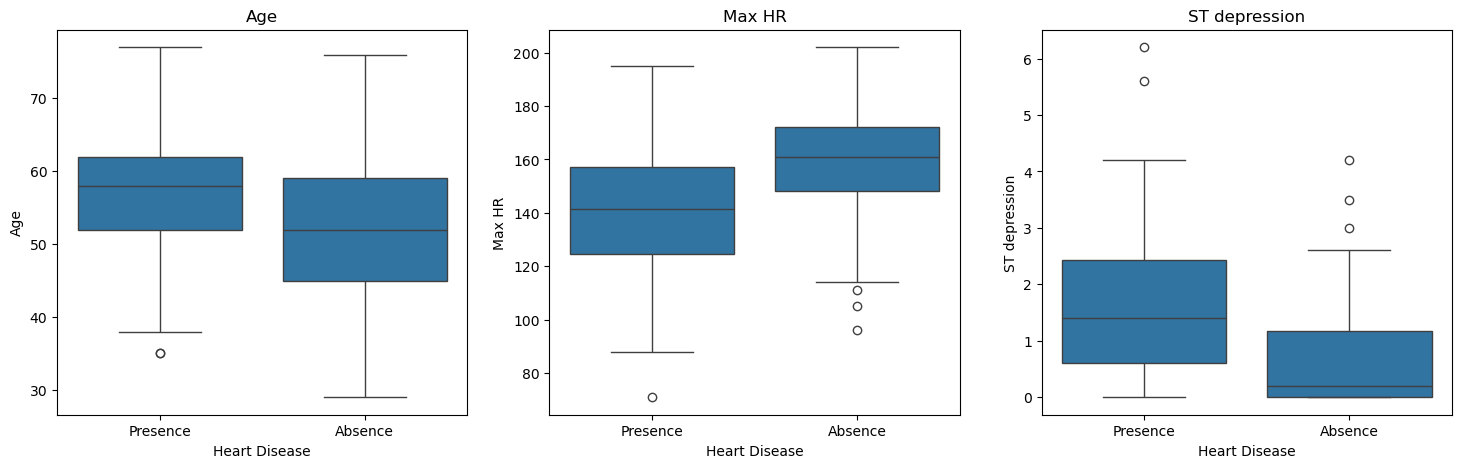

In [49]:
#boxplot von wichtigen Variablen von denen man auch weiss dass die eine verbindung zu heart disease
features = ["Age", "Max HR", "ST depression"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

for ax, feature in zip(axes, features):
    sns.boxplot(
        x="Heart Disease",
        y=feature,
        data=heart_data,
        ax=ax
    )
    ax.set_title(feature)




etwas schreiben

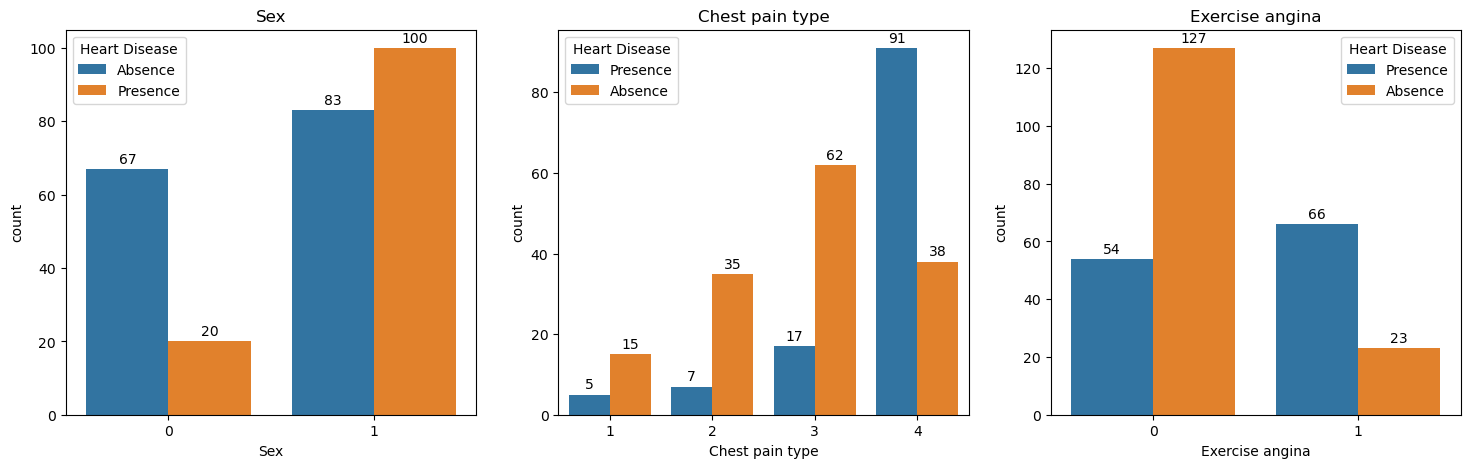

In [51]:
cat_features = ["Sex", "Chest pain type", "Exercise angina"]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, feature in zip(axes, cat_features):
    sns.countplot(
        x=feature,
        hue="Heart Disease",
        data=heart_data,
        ax=ax)
    
    for container in ax.containers:
        ax.bar_label(container, padding=2)

    ax.set_title(feature)


#noch female und male in plot

## 3. Preprocessing

Explain what kind of preprocessing, feature encoding you are applying

## 3.1 Cleaning the data

In [13]:
#drop the 'id' column
heart_data = heart_data.drop(columns=['index'])



## 3.3 Converting text labels to numbers (feature encoding)

In [ ]:
##Target encoding for absence and presence of heart disease

## Feature encoding for binary categorical features and continuous features

## Encoding

what needs to be encoded:
    Sex binary          category
    Chest pain type     unordered categories
    FBS over 120        binary
    EKG results         categories
    Exercise angina     binary
    Slope of ST         categories
    Thallium            categories

do not one hot enocde:
Age                         continuous
BP
Cholesterol
Max HR
ST depression
Number of vessels fluro     ordered count (0–3)




## 4. Modelling

### 4. 1 symple base-line model

perfect model setup for baseline: Logicstic regression

is interpretable, medically standard and easy to explain coefficients

### 4. 2 two sophisticated model approaches

number 1 random forest: captures feature interactions, non linear splits, robust on small datasets

numeber 2 Gradient Boosting or SVM (RBF)
